# Q&A Activity Question Week -09

# 1. Explain the dataset

In [44]:
#Import the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Read the csv to a variable
ad_data=pd.read_csv("Advertising.csv")
#Display the variable and see if the data is visible as rows and columns
ad_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
ad_data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [46]:
# From the above functions we could notice that there is an unwanted column which is unnamed and we can drop that from
# the dataframe
ad_data.drop(ad_data.columns[[0]], axis=1, inplace=True)

In [47]:
# Check the advertisement data after dropping the unnamed column
ad_data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [48]:
ad_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [49]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# We could notice that there is a positive correlation between Sales generated and advertisement.
# Highest sales is generated through TV followed by Radio and newspaper.

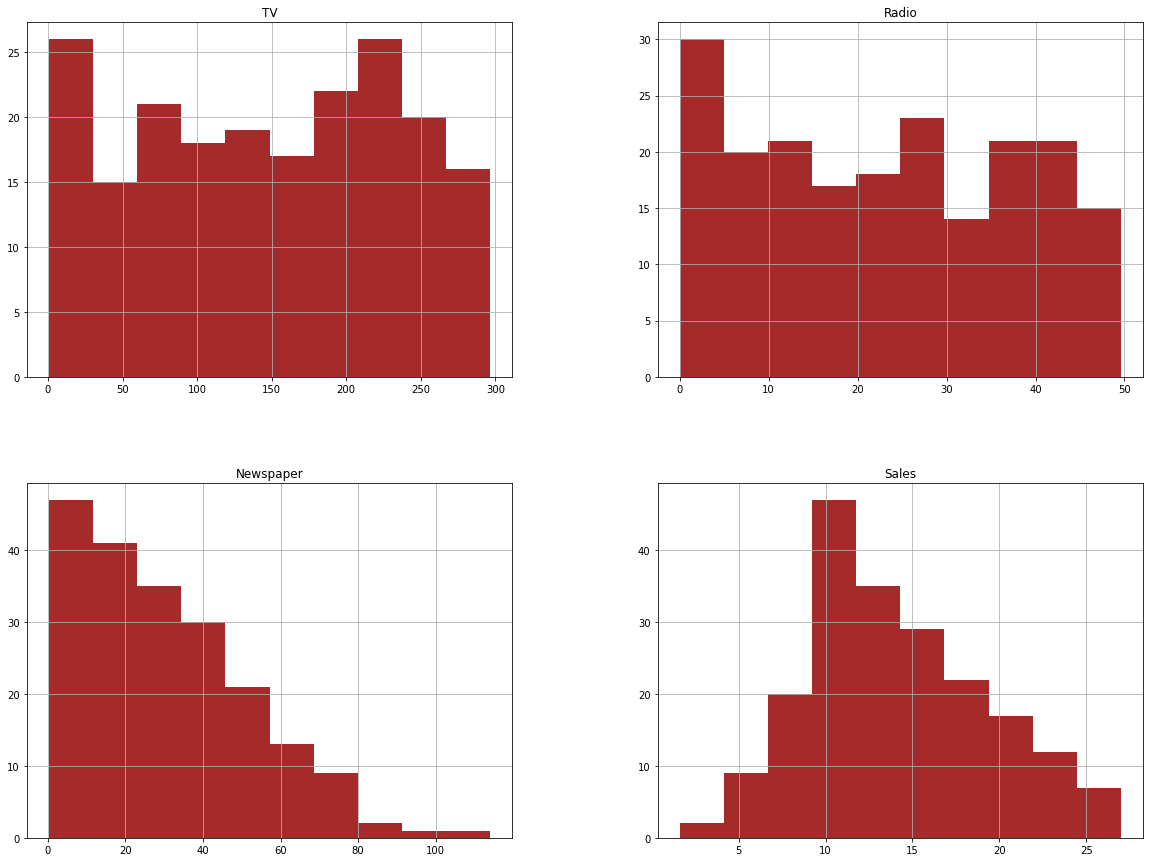

In [31]:
# Visualize the data by plotting histograms for each column distribution
freqgraph = ad_data.select_dtypes(['float64'])
freqgraph.hist(figsize=(20,15),color='brown')
plt.show()

In [ ]:
#Inference - 
# 1 . The Sales datais having nearto normal distribution. 
# 2 . The Newspaper ad is having a right skewed distribution

<AxesSubplot:>

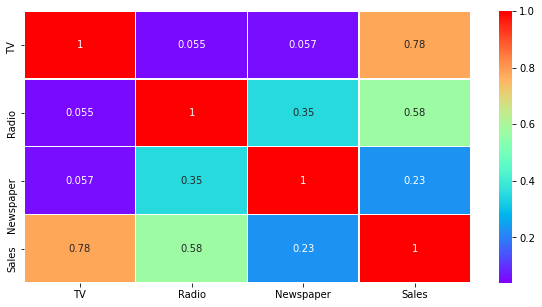

In [50]:
# Create the heat map between the correlation between each columns in the dataset
ad_corr_data = ad_data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(ad_corr_data,vmin=.04,vmax=1,annot=True,linewidth=0.2,cmap='rainbow')

In [ ]:
# If we consider sales being influenced by advertising from TV,Radio and newspaper; we could notice that they have a 
# positive effect.
# The highest sales is generated through TV ads followed by Radio & Newspaper

# 2. Check the summary statistics and discuss the max, min, avg, median,and percentiles.

In [53]:
# Use the describe function and see the mean(avg), max,min & percentiles (25,50 and 75)
ad_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [32]:
# Since median data is not available in describe function, we'll use separate function for median
ad_data.median()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64

In [ ]:
#1.  Maximum - Max amount spent on TV as (296.4 )  far exceeds the max spent on Radio (49.6 ) and Newspaper (114.0)
#2.  Minimum - Min amount spent on Radio ads was 0 followed by 0.3 for Newspaper & 0.7 fot TV. This means that there was a time 
#     when the company did not fund for any Radio ads at all.
#3.  Average - Average spent on TV (147.04) far exceeds the average spent on Radio (23.26) and newspaper(30.55). These 
#    modes of advertisements resulted on an average sale of 14.02.
#4.  Median - Median data almost matches the mean for TV (149.75 & 147.04 respectively) & Radio (22.90 & 23.26 respectively)
#5.  Percentile - Each percentile value (25,50 or 75) is higher for TV compared to Radio and Newspaper. 



# 3. The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). Comment on your findings.

In [ ]:
# Stating the hypothesis 

# Null Hypothesis (H0): amount spent for TV, radio and newspaper advertisements are equal

# Alternate Hypothesis (H1): amount spent for TV, radio and newspaper are not equal 

# Significance level is set as α= 0.05

In [59]:
#Conducting One-way ANOVA Test for finding the correct hypothesis
from scipy import stats
tv_ad = ad_data['TV']
Radio_ad = ad_data['Radio']
Newspaper_ad = ad_data['Newspaper']
α= 0.05
F_value_ad, p_value_ad = stats.f_oneway(tv_ad,Radio_ad,Newspaper_ad)
print('F test statistic value:',round(F_value_ad,3))
print('p-value for ad data:',round(p_value_ad,3))

F test statistic value: 358.851
p-value for ad data: 0.0


In [61]:
if p_value_ad < α :
    print("Reject null hypothesis which means that the Amount spent for radio,tv and newspaper ads are not equal")
else:
    print("Accept null hypothesis which means that the Amount spent for radio,tv and newspaper ads are equal.")

Reject null hypothesis which means that the Amount spent for radio,tv and newspaper ads are not equal


In [ ]:
# Submitted by Viswaraj Chandran, Aneesh Akramannil, Harikrishnan Bhuvanendran & Rahna Babu 